In [169]:
import pandas as pd
import numpy as np
import openpyxl
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import os

In [170]:
def get_db_engine():
    dotenv_path = r'C:\Users\giova\Desktop\Projeto Di2win\.env'
    
    # Carregar o arquivo .env
    load_dotenv(dotenv_path=dotenv_path)

    user = os.getenv('DB_USER')
    password = os.getenv('DB_PASSWORD')
    host = os.getenv('DB_HOST')
    port = os.getenv('DB_PORT')
    database = os.getenv('DB_NAME')

    engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')
    return engine

In [171]:
engine = get_db_engine()

df = pd.read_sql_query("SELECT * FROM reports;", engine)

In [172]:
display(df)

,id,type_document,name_document,label,inital_value,final_value,edit,is_null
0,5,cnh,01_cnh,doc_identidade->doc_identidade-org._emissor-uf,732213587,732213587,False,False
1,6,cnh,01_cnh,nome,PESSONI VALDILEI EMY,PESSONI VALDILEI EMY,False,False
2,7,cnh,01_cnh,nome_mae->filiacao,FRAGA ADONIS CASAL LIMA,FRAGA ADONIS CASAL LIMA,False,False
3,21,rg,03_rg,data_expedicao,,26/10/2005,True,True
4,29,recibos,04_recibos,cpf_cnpj_tomador,163.981.026,163.981.026 - 90,True,False
...,...,...,...,...,...,...,...,...
88,78,nfs,06_nfse,numero_rps,"1758,",1758,True,False
89,60,nfs,06_nfse,complemento->prestador_de_servicos,Cpf,,True,False
90,92,comprovante_residencia,07_comprovate_residencia,nome,ANDERSON DA SILVA,ANDERSON DA SILVA PEREIRA,True,False
91,79,nfs,06_nfse,rua->prestador_de_servicos,"AV. JAVAN LESSA RIBEIRO,",AV. JAVAN LESSA RIBEIRO,True,False


In [173]:
df.rename(columns={
    'type_document': 'Tipo do documento',
    'name_document': 'Nome do documento',
    'label': 'Campos do documento',
    'inital_value': 'Valor inicial',
    'final_value': 'Valor final',
    'edit': 'Editado',
    'is_null': 'Vazio'
}, inplace=True)


In [174]:
display(df)

,id,Tipo do documento,Nome do documento,Campos do documento,Valor inicial,Valor final,Editado,Vazio
0,5,cnh,01_cnh,doc_identidade->doc_identidade-org._emissor-uf,732213587,732213587,False,False
1,6,cnh,01_cnh,nome,PESSONI VALDILEI EMY,PESSONI VALDILEI EMY,False,False
2,7,cnh,01_cnh,nome_mae->filiacao,FRAGA ADONIS CASAL LIMA,FRAGA ADONIS CASAL LIMA,False,False
3,21,rg,03_rg,data_expedicao,,26/10/2005,True,True
4,29,recibos,04_recibos,cpf_cnpj_tomador,163.981.026,163.981.026 - 90,True,False
...,...,...,...,...,...,...,...,...
88,78,nfs,06_nfse,numero_rps,"1758,",1758,True,False
89,60,nfs,06_nfse,complemento->prestador_de_servicos,Cpf,,True,False
90,92,comprovante_residencia,07_comprovate_residencia,nome,ANDERSON DA SILVA,ANDERSON DA SILVA PEREIRA,True,False
91,79,nfs,06_nfse,rua->prestador_de_servicos,"AV. JAVAN LESSA RIBEIRO,",AV. JAVAN LESSA RIBEIRO,True,False


In [175]:
df.drop(columns=['id'], inplace=True)  # Remove a coluna 'id'

In [176]:
# dados incorretos

df_incorrect = df[df['Editado'] == True]

display(df_incorrect)

,Tipo do documento,Nome do documento,Campos do documento,Valor inicial,Valor final,Editado,Vazio
3,rg,03_rg,data_expedicao,,26/10/2005,True,True
4,recibos,04_recibos,cpf_cnpj_tomador,163.981.026,163.981.026 - 90,True,False
5,danfe,05_nfe,data_emissao_nf,14 / 01 /,14 / 01 / 2021,True,False
6,nfs,06_nfse,Valor_ISS,"0,00","90,89",True,False
7,nfs,06_nfse,Valor_de_outras_retencoes,"90,89","0,00",True,False
8,recibos,04_recibos,valor_recibo,"11,00","110,00",True,False
9,cnh,01_cnh,org._emissor->doc_identidade-org._emissor-uf,SESP GO,SESP,True,False
68,rg,03_rg,UF->naturalidade,ITU-SP,SP,True,False
69,cnh,01_cnh,cidade->local,CLAUDIO-MG,CLAUDIA-MG,True,False
86,cnh,01_cnh,cpf,896.630.040-53,896.256.040-53,True,False


In [177]:
#dados que não pertencem ao documento

df_null = df[df['Vazio'] == True]
display(df_null)

,Tipo do documento,Nome do documento,Campos do documento,Valor inicial,Valor final,Editado,Vazio
3,rg,03_rg,data_expedicao,,26/10/2005,True,True
87,cnh,01_cnh,data_emissao,,17/06/2008,True,True


In [178]:
#dados corretos

df_correct = df[df['Editado'] == False]
display(df_correct)

,Tipo do documento,Nome do documento,Campos do documento,Valor inicial,Valor final,Editado,Vazio
0,cnh,01_cnh,doc_identidade->doc_identidade-org._emissor-uf,732213587,732213587,False,False
1,cnh,01_cnh,nome,PESSONI VALDILEI EMY,PESSONI VALDILEI EMY,False,False
2,cnh,01_cnh,nome_mae->filiacao,FRAGA ADONIS CASAL LIMA,FRAGA ADONIS CASAL LIMA,False,False
10,cnh,01_cnh,nome_pai->filiacao,IONEDA MIYAKUCHI ZAV SANTOS,IONEDA MIYAKUCHI ZAV SANTOS,False,False
11,cnh,01_cnh,numero_do_espelho_da_habilitacao,599905390,599905390,False,False
...,...,...,...,...,...,...,...
81,comprovante_residencia,07_comprovate_residencia,estado,PE,PE,False,False
82,comprovante_residencia,07_comprovate_residencia,logradouro,"RUA NOSSA SENHORA DAS GRACAS,","RUA NOSSA SENHORA DAS GRACAS,",False,False
83,comprovante_residencia,07_comprovate_residencia,municipio,RECIFE,RECIFE,False,False
84,comprovante_residencia,07_comprovate_residencia,numero,56,56,False,False


In [179]:
#busca rg
total_rg = df[df['Tipo do documento'] == 'cpf']
display(total_rg)
total_rg.shape

,Tipo do documento,Nome do documento,Campos do documento,Valor inicial,Valor final,Editado,Vazio
17,cpf,02_cpf,cpf,090.490.924-70,090.490.924-70,False,False
18,cpf,02_cpf,data_nascimento,06/01/1963,06/01/1963,False,False
19,cpf,02_cpf,nome,PESTILHO MUNIR VASSAO,PESTILHO MUNIR VASSAO,False,False


(3, 7)

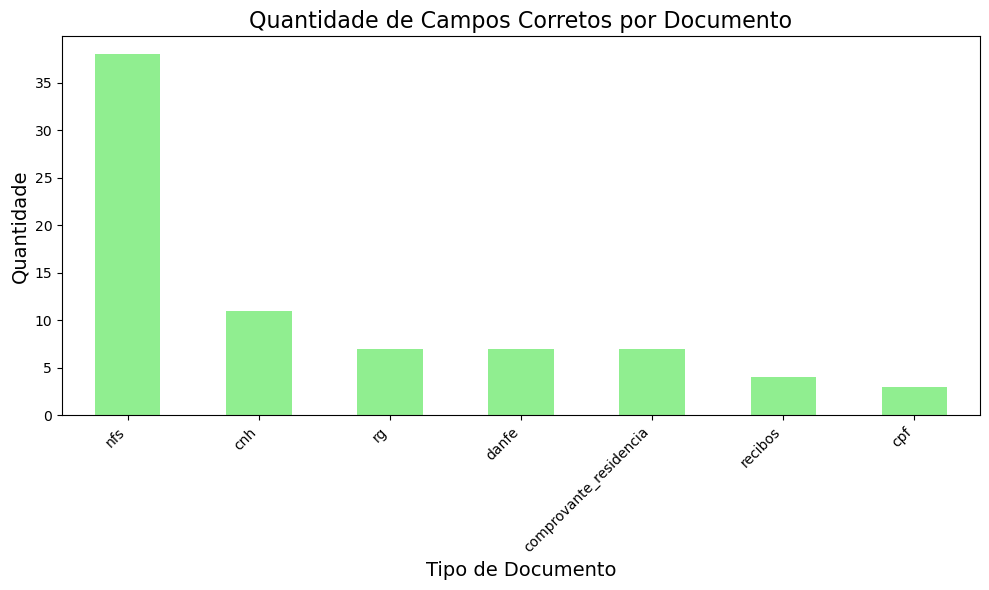

In [180]:
import matplotlib.pyplot as plt

# filtragem dos documentos corretos
df_correct = df[df['Editado'] == False]

# quantidade de documentos corretos por tipo de documento
tipo_docs = df_correct['Tipo do documento'].value_counts()

# histograma
plt.figure(figsize=(10, 6))
tipo_docs.plot(kind='bar', color='lightgreen')

# configuração do título e os rótulos
plt.title('Quantidade de Campos Corretos por Documento', fontsize=16)
plt.xlabel('Tipo de Documento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# exibir o histograma
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('documentos_corretos.png')
plt.show()

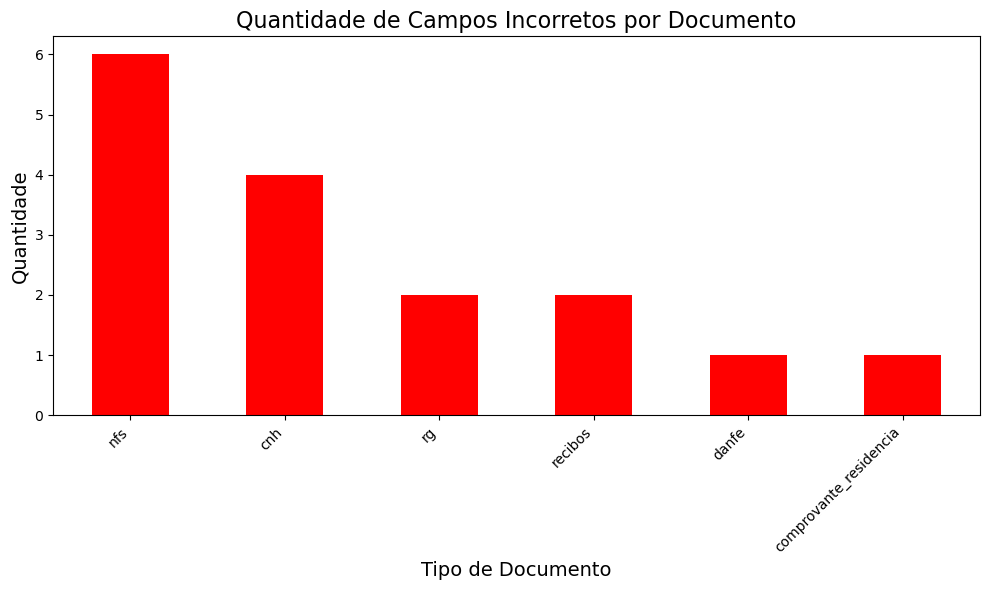

In [181]:
import matplotlib.pyplot as plt

# filtragem dos documentos corretos
df_incorrect = df[df['Editado'] == True]

# quantidade de documentos corretos por tipo de documento
tipo_docs = df_incorrect['Tipo do documento'].value_counts()

# histograma
plt.figure(figsize=(10, 6))
tipo_docs.plot(kind='bar', color='red')

# configuração do título e os rótulos
plt.title('Quantidade de Campos Incorretos por Documento', fontsize=16)
plt.xlabel('Tipo de Documento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# exibir o histograma
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('documentos_incorretos.png')
plt.show()

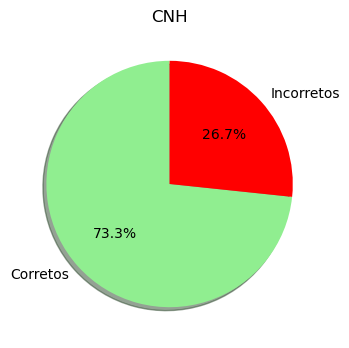

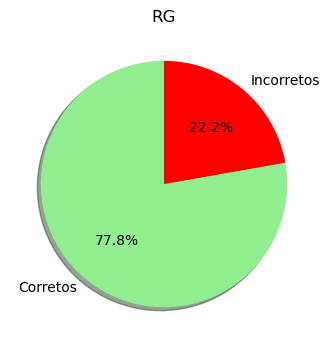

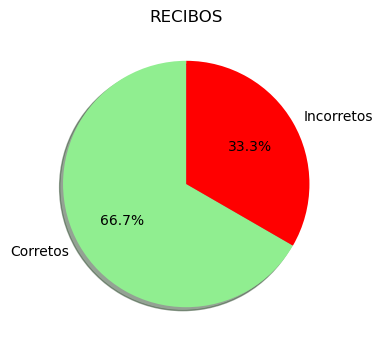

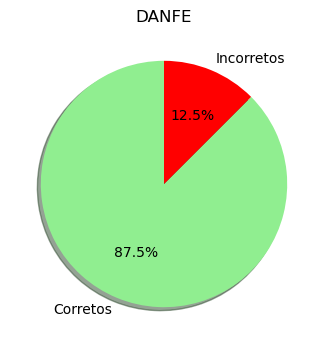

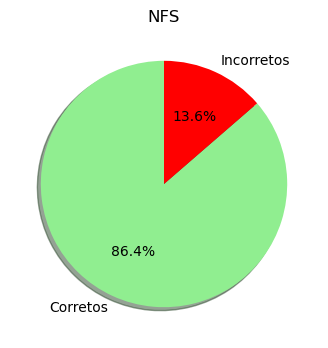

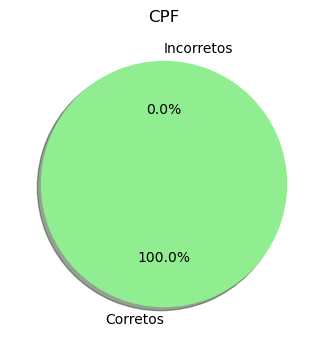

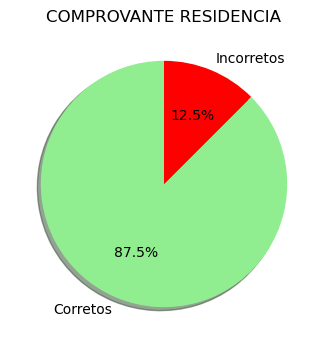

In [182]:
import os

# Função para gerar gráficos para cada tipo de documento e salvar como imagem PNG
def doc_graphic(documento):

    # Separando dados corretos e incorretos para o tipo de documento específico
    df_incorrect = df[(df['Editado'] == True) & (df['Tipo do documento'] == documento)]
    df_correct = df[(df['Editado'] == False) & (df['Tipo do documento'] == documento)]

    # Contando registros para o gráfico
    sizes = [len(df_correct), len(df_incorrect)]
    labels = ['Corretos', 'Incorretos']

    colors = ['lightgreen', 'red']
    
    # Criando o gráfico de pizza
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
    plt.title(f"{documento.upper().replace('_',' ')}")
    
    # Salvando o gráfico como imagem PNG
    filename = f"{documento}_grafico.png"
    fig.savefig(filename, format='png')

tipos_documento = df['Tipo do documento'].unique()
for documento in tipos_documento:
    doc_graphic(documento)

In [183]:
def insert_styled_header(worksheet):
    # Definindo o texto do cabeçalho
    header_text = "Tabela de documentos da plataforma ExtrAIdados"
    
    # Preencher as células de A1 até J1 com o mesmo estilo
    for col in range(1, 11):  # Colunas de A (1) até J (10)
        cell = worksheet.cell(row=1, column=col)
        cell.value = header_text if col == 1 else ""  # Aplica o texto apenas na célula A1
        cell.font = Font(name="Montserrat", color="FFFFFF", bold=True, size=14)  # Fonte Montserrat, negrito, branco
        cell.fill = PatternFill(start_color="FF69B4", end_color="FF69B4", fill_type="solid")  # Fundo rosa

In [184]:
# Bibliotecas necessárias
import pandas as pd
import os
from openpyxl.styles import PatternFill, Font
from openpyxl import Workbook
from openpyxl.drawing.image import Image

# Adicionar a coluna 'Resultado' com base na coluna 'Editado'
df.insert(0, 'Resultado', df['Editado'].apply(lambda x: 'Correto' if not x else 'Incorreto'))

# Função para estilizar a coluna 'Resultado' com cores
def styling(cell):
    if cell.value == "Correto":
        cell.fill = PatternFill(start_color="BDF5BD", end_color="BDF5BD", fill_type="solid")  # Verde
    elif cell.value == "Incorreto":
        cell.fill = PatternFill(start_color="FF7979", end_color="FF7979", fill_type="solid")  # Vermelho

# Adicionar colunas de porcentagens por tipo de documento
df['Campos Corretos (%)'] = (
    df.groupby('Tipo do documento')['Editado'].transform(lambda x: (~x).mean() * 100)
)

df['Campos Incorretos (%)'] = (
    df.groupby('Tipo do documento')['Editado'].transform(lambda x: x.mean() * 100)
)

# Porcentagem global de corretos e incorretos
percent_correct = (df['Editado'] == False).mean() * 100
percent_incorrect = 100 - percent_correct

# Gerando o Excel
with pd.ExcelWriter("relatorio_atualizado.xlsx", engine="openpyxl") as writer:
    # Exportar o DataFrame para o Excel
    df.to_excel(writer, sheet_name="Dados", index=False, startrow=1)

    # Configurar o workbook e worksheet
    workbook = writer.book
    worksheet = writer.sheets['Dados']

    # Estilizar a coluna 'Resultado' com as cores
    for row in range(3, len(df) + 3):  # Começa na linha 3 para ignorar o cabeçalho e a linha de título
        cell = worksheet[f"A{row}"]  # A coluna 'Resultado' é sempre a primeira
        styling(cell)

    # Inserir cabeçalhos descritivos
    insert_styled_header(worksheet)

    # Inserir gráficos (ajustando imagens conforme necessário)
    img_corretos = Image('documentos_corretos.png')
    img_corretos.width, img_corretos.height = img_corretos.width * 0.8, img_corretos.height * 0.8
    img_incorretos = Image('documentos_incorretos.png')
    img_incorretos.width, img_incorretos.height = img_incorretos.width * 0.8, img_incorretos.height * 0.8

    worksheet.add_image(img_corretos, 'M2')
    worksheet.add_image(img_incorretos, 'M30')

    # Configurar posições de gráficos por tipo de documento
    graph_positions = [
        ('M60', 'R60', 'W60'),  
        ('M80', 'R80', 'W80'),  
        ('M100',)              
    ]

    # Adicionar gráficos individuais para cada tipo de documento
    for i, documento in enumerate(df['Tipo do documento'].unique()):
        image_path = f"{documento}_grafico.png"
        if os.path.exists(image_path):
            img = Image(image_path)
            img.width, img.height = img.width * 0.8, img.height * 0.8
            
            # Determinar a posição do gráfico
            pos = graph_positions[i // 3][i % 3]  
            worksheet.add_image(img, pos)

# Limpeza de arquivos temporários
for documento in df['Tipo do documento'].unique():
    image_path = f"{documento}_grafico.png"
    if os.path.exists(image_path):
        os.remove(image_path)
